<a href="https://colab.research.google.com/github/braulioalda4-code/nuevo_repositorio/blob/main/P1U3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./datasets/Spotify_Youtube.csv", index_col=0)
data.head()
data.shape

(20718, 27)

In [2]:
# eliminar columnas > 3% de nulos
null_counts = data.isnull().sum()

columns_to_drop = null_counts.loc[null_counts > (0.03 * len(data))].index

data_cleaned = data.drop(columns=columns_to_drop)

data_cleaned.shape

(20718, 26)

In [3]:
# Reemplazar nulos en variables numéricas con la mediana
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)

data_cleaned.isnull().sum()

/tmp/ipython-input-4085655383.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)


,0
Artist,0
Url_spotify,0
Track,0
Album,0
Album_type,0
Uri,0
Danceability,0
Energy,0
Key,0
Loudness,0


In [5]:
#cambiar las columnas catgoricas

string_columns = data_cleaned.select_dtypes(include=['object']).columns

for col in string_columns:
    data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)

data_cleaned.isnull().sum()

/tmp/ipython-input-4106809249.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)


,0
Artist,0
Url_spotify,0
Track,0
Album,0
Album_type,0
Uri,0
Danceability,0
Energy,0
Key,0
Loudness,0


In [6]:
#Convertir en int64 algunas columnas float64
float_columns = ['Key', 'Tempo', 'Views', 'Likes', 'Comments', 'Stream']

for col in float_columns:
  data_cleaned[col] = data_cleaned[col].astype('int64')

data_cleaned.dtypes

,0
Artist,object
Url_spotify,object
Track,object
Album,object
Album_type,object
Uri,object
Danceability,float64
Energy,float64
Key,int64
Loudness,float64


In [7]:
descriptive_stats = data_cleaned[['Views', 'Likes', 'Comments', 'Stream']].describe()
descriptive_stats

,Views,Likes,Comments,Stream
count,2.071800e+04,2.071800e+04,2.071800e+04,2.071800e+04
mean,9.213575e+07,6.492700e+05,2.685321e+04,1.335440e+08
std,2.717686e+08,1.767896e+06,1.906038e+05,2.411317e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,1.950563e+06,2.302175e+04,5.420000e+02,1.825666e+07
50%,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,6.749228e+07,4.996608e+05,1.372900e+04,1.337912e+08
max,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [8]:
# Analisis descriptivo
descriptive_stats = data_cleaned[['Views', 'Likes', 'Comments', 'Stream']].describe()
median_stat = data_cleaned[['Views', 'Likes', 'Comments', 'Stream']].median()
descriptive_stats.loc['median'] = median_stat

descriptive_stats

,Views,Likes,Comments,Stream
count,2.071800e+04,2.071800e+04,2.071800e+04,2.071800e+04
mean,9.213575e+07,6.492700e+05,2.685321e+04,1.335440e+08
std,2.717686e+08,1.767896e+06,1.906038e+05,2.411317e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,1.950563e+06,2.302175e+04,5.420000e+02,1.825666e+07
50%,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,6.749228e+07,4.996608e+05,1.372900e+04,1.337912e+08
max,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09
median,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07


In [19]:
top_youtube = data_cleaned.loc[data_cleaned['Views'] > 500000000]
top_youtube.shape

(835, 26)

In [20]:
top_youtube['likes_to_Views'] = (top_youtube['Likes'] / top_youtube['Views']).round(2)
top_youtube

/tmp/ipython-input-2148964925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_youtube['likes_to_Views'] = (top_youtube['Likes'] / top_youtube['Views']).round(2)


,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,likes_to_Views
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221,6220896,169907,True,True,1040234854,0.01
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958,6197318,155930,True,True,617259738,0.01
10,Red Hot Chili Peppers,https://open.spotify.com/artist/0L8ExT028jH3dd...,Californication,Californication (Deluxe Edition),album,spotify:track:48UPSzbZjgc449aqz8bxox,0.592,0.767,9,-2.788,...,https://www.youtube.com/watch?v=YlUKcNNmywk,Red Hot Chili Peppers - Californication (Offic...,Red Hot Chili Peppers,1018811259,4394471,121452,True,True,1055738398,0.00
14,Red Hot Chili Peppers,https://open.spotify.com/artist/0L8ExT028jH3dd...,Otherside,Californication (Deluxe Edition),album,spotify:track:64BbK9SFKH2jk86U3dGj2P,0.458,0.795,0,-3.265,...,https://www.youtube.com/watch?v=rn_YodiJO6k,Red Hot Chili Peppers - Otherside [Official Mu...,Red Hot Chili Peppers,673528656,3140356,60091,True,True,732774515,0.00
20,50 Cent,https://open.spotify.com/artist/3q7HBObVc0L8jN...,In Da Club,Get Rich Or Die Tryin',album,spotify:track:4RY96Asd9IefaL3X4LOLZ8,0.902,0.720,6,-2.776,...,https://www.youtube.com/watch?v=5qm8PH4xAss,50 Cent - In Da Club (Official Music Video),50CentVEVO,1682616458,10481678,296745,True,True,1041736808,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20307,CoComelon,https://open.spotify.com/artist/6SXTTUJxIVwMbc...,Itsy Bitsy Spider,"CoComelon Kids Hits, Vol. 1",album,spotify:track:6cKlr2BOXBaqiuaHUY5Zwo,0.919,0.289,2,-12.244,...,https://www.youtube.com/watch?v=ljHGusbX7Bk,Itsy Bitsy Spider + More Nursery Rhymes & Kids...,Cocomelon - Nursery Rhymes,586937661,1942075,0,True,True,39785376,0.00
20308,CoComelon,https://open.spotify.com/artist/6SXTTUJxIVwMbc...,Baby Shark,Nursery Rhymes by CoComelon,album,spotify:track:7zD97mcPo9fng0aJqUhFvd,0.779,0.587,7,-8.131,...,https://www.youtube.com/watch?v=020g-0hhCAU,Baby Shark | CoComelon Nursery Rhymes & Kids S...,Cocomelon - Nursery Rhymes,2645859287,6604353,0,True,True,22632716,0.00
20309,CoComelon,https://open.spotify.com/artist/6SXTTUJxIVwMbc...,Old MacDonald,"CoComelon Kids Hits, Vol. 1",album,spotify:track:5txSLkf7BeYIgTtUnVDDG8,0.704,0.479,1,-12.362,...,https://www.youtube.com/watch?v=Wm4R8d0d8kU,Old MacDonald | CoComelon Nursery Rhymes & Kid...,Cocomelon - Nursery Rhymes,1545924229,5397846,0,True,True,27938205,0.00
20310,CoComelon,https://open.spotify.com/artist/6SXTTUJxIVwMbc...,Finger Family,"CoComelon Kids Hits, Vol. 2",album,spotify:track:679VCjP1C3DBkVBEeB34yU,0.816,0.565,9,-11.555,...,https://www.youtube.com/watch?v=hqr46XZhtRg,Finger Family + More Nursery Rhymes & Kids Son...,Cocomelon - Nursery Rhymes,516084212,1714627,0,True,True,26843793,0.00


In [18]:
# Crear nueva columna "Likes to Views" (proporción de likes vs vistas)
top_youtube['likes_to_Views'] = (top_youtube['Likes'] / top_youtube['Views']).round(2)

# Analizar estadísticas por tipo de álbum
album_analysis = top_youtube.groupby('Album_type').agg({
    'Energy': ['mean', 'median'],
    'Danceability': ['mean', 'median'],
    'Views': 'sum',
    'Stream': 'sum'
}).reset_index()

# Mostrar primeras filas del análisis
print(album_analysis.head())

    Album_type    Energy         Danceability                Views  \
                    mean  median         mean median           sum   
0        album  0.683681  0.7095     0.670642  0.692  705582904484   
1  compilation  0.644563  0.6810     0.680406  0.734   28436271385   
2       single  0.683443  0.6720     0.694234  0.727  172252151156   

         Stream  
            sum  
0  521671390041  
1    9327303407  
2   90193711965  


/tmp/ipython-input-193363891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_youtube['likes_to_Views'] = (top_youtube['Likes'] / top_youtube['Views']).round(2)


In [23]:
# Filtrar canciones con proporción "Likes_to_Views" menor a 0.01
low_likes = top_youtube[top_youtube['likes_to_Views'] < 0.01]

# Calcular el número total de canciones por "Album_type"
low_likes_summary = low_likes.groupby('Album_type').size().reset_index(name='count')

low_likes_summary.head()

,Album_type,count
0,album,259
1,compilation,10
2,single,63


/tmp/ipython-input-405042025.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Album type')


<Axes: title={'center': 'Relación entre Energy y Stream para canciones con baja proporción de Likes'}, xlabel='Energy', ylabel='Stream (promedio)'>

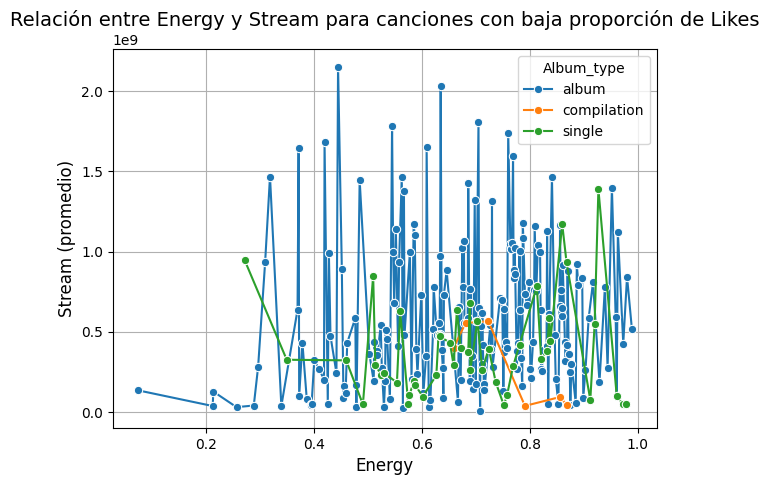

In [26]:
# Promedio de "Stream" por "Energy" y "Album_type" en el subconjunto 'Low_likes'
tren_data = low_likes.groupby(['Album_type', 'Energy']).agg({'Stream': 'mean'}).reset_index()

# Personalizar el grafico
plt.title('Relación entre Energy y Stream para canciones con baja proporción de Likes', fontsize=14)
plt.xlabel('Energy', fontsize=12)
plt.ylabel('Stream (promedio)', fontsize=12)
plt.legend(title='Album type')
plt.grid(True)
plt.tight_layout()
sns.lineplot(data=tren_data, x='Energy', y='Stream', hue='Album_type', marker='o')

In [30]:
heatmap_data = low_likes.groupby('Album_type', as_index=False)['Danceability'].mean().set_index('Album_type')

<Axes: title={'center': 'Mapa de calor en promedio de bailabilidad segun el tipo de canción'}, ylabel='Album_type'>

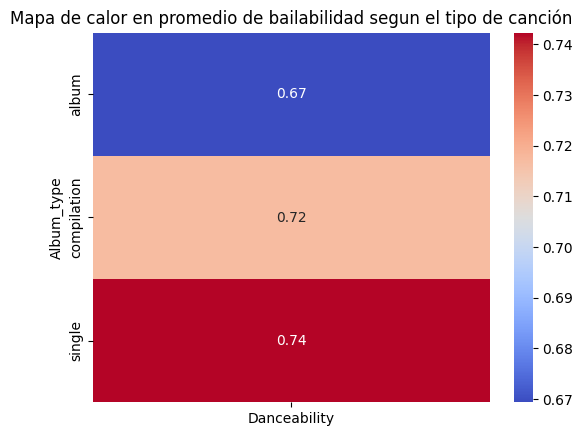

In [31]:
# Personalizar el mapa en color
plt.title('Mapa de calor en promedio de bailabilidad segun el tipo de canción')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')